# HandsON-Dr. Semmelweis and the Discovery of Handwashing

# Task-1

In [1]:
# importing pandas modules
import pandas as pd

# Read datasets of yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('/content/drive/MyDrive/yearly_deaths_by_clinic.csv')

# Printing yearly 
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


# Task-2

In [2]:
#  proportion of deaths per no. births
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

#  clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = yearly[yearly['clinic'] == 'clinic 1']
yearly2 = yearly[yearly['clinic'] == 'clinic 2']

# Print out yearly1
print(yearly1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


# Task-3

Text(0, 0.5, 'Proportion deaths')

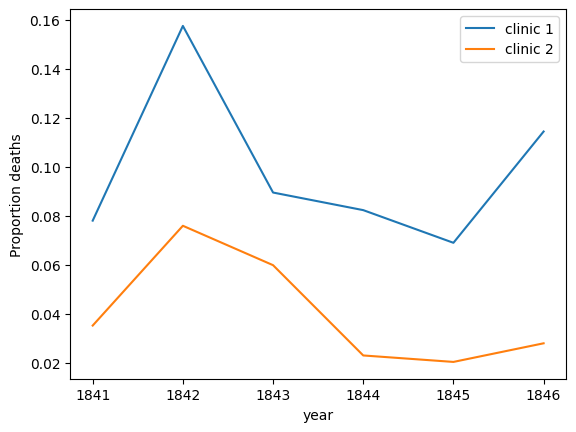

In [3]:
%matplotlib inline

# Ploting  yearly proportion of deaths at the two clinics
ax = yearly1.plot(x='year', y='proportion_deaths', label='clinic 1')
yearly2.plot(x='year', y='proportion_deaths', label='clinic 2', ax=ax)
ax.set_ylabel('Proportion deaths')

# Task-4

In [4]:
# Read dataset of monthly_deaths.csv into monthly
monthly = pd.read_csv('/content/drive/MyDrive/monthly_deaths.csv', parse_dates=['date'])

#  proportion of deaths per no. births
monthly['proportion_deaths'] = monthly['deaths'] / monthly['births']

# Printing the first five rows in monthly
print(monthly.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


# Task-5

Text(0, 0.5, 'Proportion deaths')

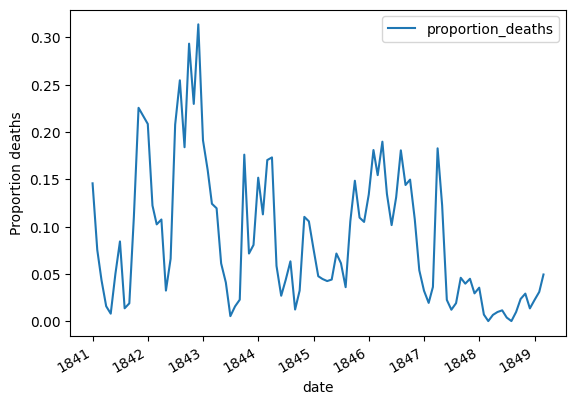

In [5]:
# Ploting  monthly proportion of deaths
ax = monthly.plot(x='date', y='proportion_deaths')
ax.set_ylabel('Proportion deaths')

# Task-6

Text(0, 0.5, 'Proportion deaths')

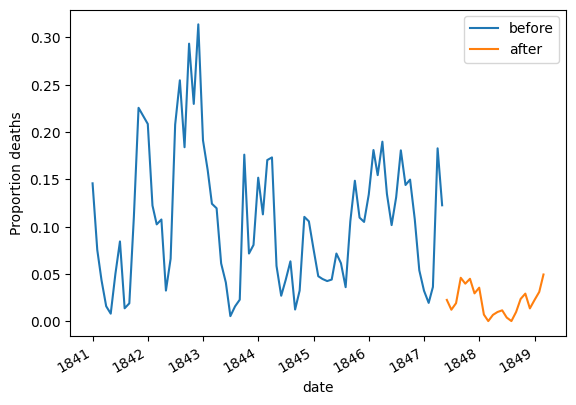

In [6]:
# Date when handwashing was made important
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly dataset into before_washing and after_washing of handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Ploting monthly proportion of deaths before_washing and after_washing of handwashing
ax = before_washing.plot(x='date', y='proportion_deaths', label='before')
after_washing.plot(x='date', y='proportion_deaths', label='after', ax=ax)
ax.set_ylabel('Proportion deaths')

# Taask-7

In [7]:
# Difference in mean of monthly proportion of deaths due to handwashing
before_proportion = before_washing.proportion_deaths
after_proportion = after_washing.proportion_deaths
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336

# Task-8

In [8]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100679
0.975   -0.067211
dtype: float64

# Task-9

In [9]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True